## Project No2 - Concentration Theorems

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

import matplotlib as mpl

mpl.rcParams['font.size'] = 16

### 0. Setup 

We will consider $X_1, X_2, \ldots, X_n$ a sequence of i.i.d. random variables with mean $\mathbb{E}[X_1] = \mu$. We define the sample mean as 
$$
\bar X_n = \frac{1}{n} \sum_{i=1}^n X_i
$$
The objective of this project is to study the behavior of $\bar X_n$ as $n \rightarrow \infty$. 

### 1. Law of Large Numbers

Here we are going to focus in the convergence in probability and almost surely of the sample mean of i.i.d. random variables. Remember that a sequence of random variables $Y_1, Y_2, \ldots$ converges in probability to a random variable $Y$ if for every $\epsilon > 0$ we have 
$$
\lim_{n \rightarrow \infty} \mathbb P \left( | Y_n - Y | > \epsilon \right) = 0
$$
The **weak law of large numbers** states 

> The sample mean $\bar X_n$ converges in probability to $\mu$.

The **strong law of large numbers** states a more strict sense in which this convergence happens

> The sample mean $\bar X_n$ converges almost surely to $\mu$. 

Let's see how these two behave numerically.

#### 1.1. Gaussian case

Consider the simple case where $X_i \sim N(0,1)$. Compute the sample mean for increasing values of $n$ and show how the sample mean converges to $0$. To do this, you can simply show a plot of the sample mean as a function of $n$. 

***Tip:*** You can compute the sample mean of a normal random variable by simply doing
```python
n = 100
one_sample_mean = np.mean(np.random.normal(loc=0.0, scale=1.0, size=n))
```
The same works if you want to compute a total of `n_sim` sample means:
```python
n = 100
n_sim = 500
many_sample_means = np.mean(np.random.normal(loc=0.0, scale=1.0, size=(n, n_sim)), axis=0)
```

In [166]:
# TO DO CELL
np.random.seed(24)
sample_means = []
n_lst = np.arange(10, 50050, step = 50)
for n in n_lst:
    sample_means.append(np.mean(np.random.normal(loc=0.0, scale=1.0, size=n)))

Text(0, 0.5, 'Sample Mean')

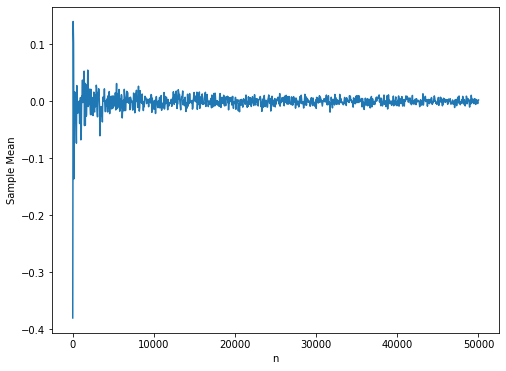

In [167]:
plt.figure(figsize=(8,6))
plt.plot(n_lst, sample_means)
plt.xlabel("n")
plt.ylabel("Sample Mean")

#### 1.2. Beta distribution

Now, repeat the same experiment but for a Beta distribution with parameters of your choice. Remember that the mean of a Beta distribution with parameters $a$ and $b$ is $a / (a+b)$. 

For this section, it is important that you compute the sample mean as you increase the value of $n$ *for the same realization of the random variables $X_i$*. To do this, first sample all the values of $X_1, X_2, \ldots, X_{n_{max}}$ just one time and then compute the partial averages $\bar X_n$ for different values of $n \leq n_{max}$. 

Make this plot is logarithmic scale for both axes. This is how your solution should look like. If you kernel dies when running the simulations, try reducing the total number of samples.

<img src="solution_1_2.png" alt="Solution" />

In [50]:
# TO DO CELL
a = 2
b = 3
n = 1000000
true_mean = a / (a + b)
n_lst = np.arange(10, n + 1, step = 50)
beta_samp = np.random.beta(a, b, size = n)
beta_samp_means = []
for n in n_lst:
    beta_samp_means.append(np.mean(beta_samp[0:n]))

Text(0, 0.5, 'log | mean - sample mean |')

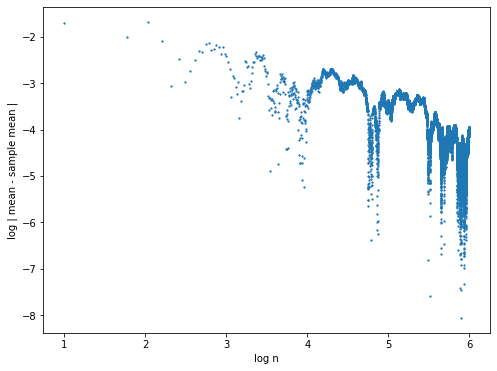

In [52]:
log_mean_dist = [np.log10(np.abs(true_mean - mean)) for mean in beta_samp_means]
# mean_dist = np.array([np.abs(true_mean - mean) for mean in beta_samp_means])
log_ns = np.log10(n_lst) 
plt.figure(figsize=(8,6))
plt.scatter(log_ns, log_mean_dist, s = 1.5)
plt.xlabel("log n")
plt.ylabel("log | mean - sample mean |")
# plt.scatter(n_lst, mean_dist, s = 1)
# plt.xscale('log', basex = 10)
# plt.yscale('log', basey = 10)

**To Discuss:** When doing this calculations, what time of convergence are we studying? almost surely or in probability? 

*Since we need to do a large number of simulations to show the convergence, we are studying convergence in probability.*

**To Discuss:** Can you identify the general trend in the previous plot? Can you give meaning the low peaks in the plot? 

*Since we are sequentially updating the means, it is essentially a random walk, and the low peaks show that we are getting extremely close to the true mean for certain steps.*


#### 1.3. Compute the probability

Now, instead of evaluating the value of $\bar X_n$, compute the probability $\mathbb P \left( | \bar X_n | > \epsilon \right)$ for different values of $n$ and $\epsilon$ and plot the result as a function of $n$. What do you observe? See the next item for an example of the solution for this problem.

In [122]:
# Note for N(0, 1)
e1 = 0.1
e2 = 0.05
e3 = 0.01

# n_lst = np.arange(1000, 20100, step = 100)
n_lst = range(1, 1001)

results_dict = {}
results_dict[e1] = []
results_dict[e2] = []
results_dict[e3] = []

for e in results_dict.keys():
    for n in n_lst:
        temp_means = []
        for _ in range(500):
            temp_means.append(np.abs(np.mean(np.random.normal(loc = 0.0, scale = 1.0, size = n))))
        prob = np.mean([mean > e for mean in temp_means])
        results_dict[e].append(prob)


In [123]:
import pandas as pd
prob_df = pd.DataFrame(results_dict)
prob_df

,0.10,0.05,0.01
0,0.910,0.966,0.990
1,0.896,0.938,0.988
2,0.866,0.938,0.980
3,0.840,0.916,0.984
4,0.830,0.918,0.972
...,...,...,...
995,0.000,0.128,0.768
996,0.002,0.098,0.770
997,0.000,0.120,0.760
998,0.002,0.134,0.750


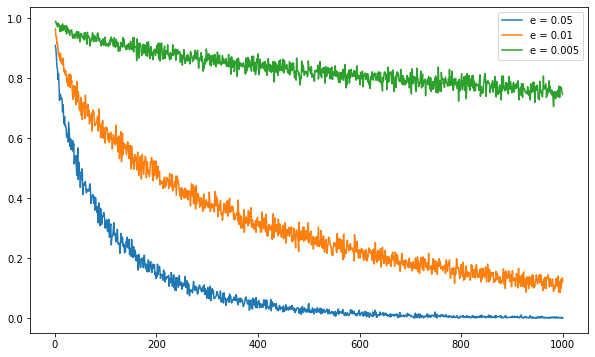

In [125]:
# n_lst = np.arange(1000, 20100, step = 100)
plt.figure(figsize=(10,6))
plt.plot(n_lst, prob_df)
plt.gca().legend(('e = 0.05', 'e = 0.01', 'e = 0.005'))

#### 1.4. Concentration bounds

Repeat the same plot that in the last item and show how it compares with the upper bound obtain from using Chebyshev's inequality
$$
\mathbb P \left( | \bar X_n | > \epsilon \right) \leq \frac{1}{n \epsilon^2}
$$
and the Chernoff bound
$$
\mathbb P \left( | \bar X_n | > \epsilon \right) \leq 2 \exp \left( - \frac{\epsilon^2 n}{2} \right)
$$
At the end of the day, you should obtain something like this

<img src="solution_1_34.png" alt="Solution" />

In [126]:
cheby = [1 / (n * (e1**2)) for n in n_lst]
chernoff = [2 * np.exp(-(e1**2) * n / 2) for n in n_lst]
prob_df2 = pd.DataFrame(results_dict[e1], columns = ['e1'])
prob_df2['chebyshev'] = cheby
prob_df2['chernoff'] = chernoff
prob_df2

,e1,chebyshev,chernoff
0,0.910,100.000000,1.990025
1,0.896,50.000000,1.980100
2,0.866,33.333333,1.970224
3,0.840,25.000000,1.960397
4,0.830,20.000000,1.950620
...,...,...,...
995,0.000,0.100402,0.013748
996,0.002,0.100301,0.013680
997,0.000,0.100200,0.013611
998,0.002,0.100100,0.013543


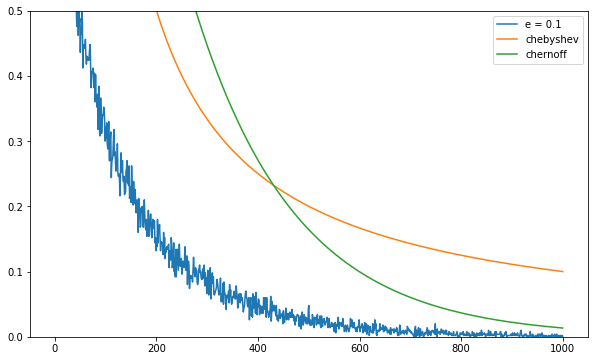

In [128]:
plt.figure(figsize=(10,6))
plt.plot(n_lst, prob_df2)
plt.ylim(0, 0.5)
plt.gca().legend(('e = 0.1', 'chebyshev', 'chernoff'))

### 2. Central Limit theorem 

Let's first state one more time the Central Limit Theorem

> Consider $X_1, X_2, \ldots, X_n$ a sequence of i.i.d. random variables with mean $\mathbb{E}[X_1] = \mu$ and finite variance $\mathbb{V}ar[X_1] = \sigma^2$. If call 
$$
\bar X_n = \frac{1}{n} \sum_{i=1}^n X_i
$$
the sample mean, then 
$$
\sqrt{n} \frac{\bar X_n - \mu}{\sigma}
$$
converges in distribution to the standard Normal distribution $N(0,1)$.



#### 2.1. Continuous case

Pick a continuous random variable with bounded second moment and show that the central limit theorem holds numerically. Sample the sample mean $\bar X_n$ for various numbers of $n$ and show that $\sqrt{n}(\bar X_n - \mu) / \sigma$ converges to the standard normal distribution.

This is how the solution should look like for the mean of Beta distributions and a total of 10000 simulations. 

<img src="solution_2_1.png" alt="Solution" />

### n = 30

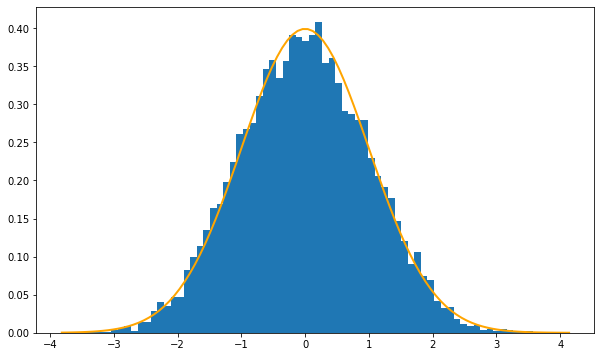

In [157]:
from scipy.stats import norm
a = 2
b = 3
n = 30
true_mean = a / (a + b)
true_sig = np.sqrt((a * b) / (((a + b) ** 2) * (a + b + 1)))
temp_means = []
temp_samp = []
for _ in range(10000):
    temp_mean = np.mean(np.random.beta(a, b, size = n))
    temp_samp.append(np.sqrt(n) * (temp_mean - true_mean) / true_sig)
plt.figure(figsize=(10,6))
plt.hist(temp_samp, density = True, bins = 70);

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, 1)

plt.plot(x, p, 'k', linewidth = 2, color = "orange")

### n = 50

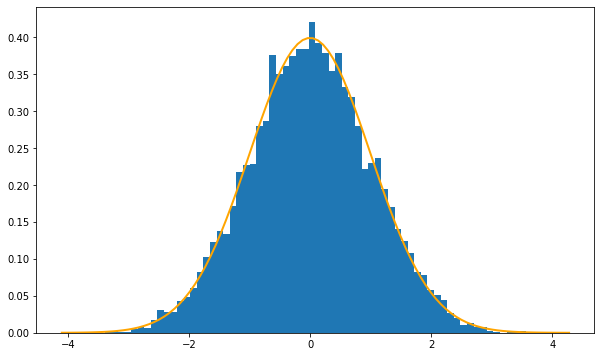

In [158]:
a = 2
b = 3
n = 50
true_mean = a / (a + b)
true_sig = np.sqrt((a * b) / (((a + b) ** 2) * (a + b + 1)))
temp_means = []
temp_samp = []
for _ in range(10000):
    temp_mean = np.mean(np.random.beta(a, b, size = n))
    temp_samp.append(np.sqrt(n) * (temp_mean - true_mean) / true_sig)
plt.figure(figsize=(10,6))
plt.hist(temp_samp, density = True, bins = 70);

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, 1)

plt.plot(x, p, 'k', linewidth = 2, color = "orange")

### n = 100

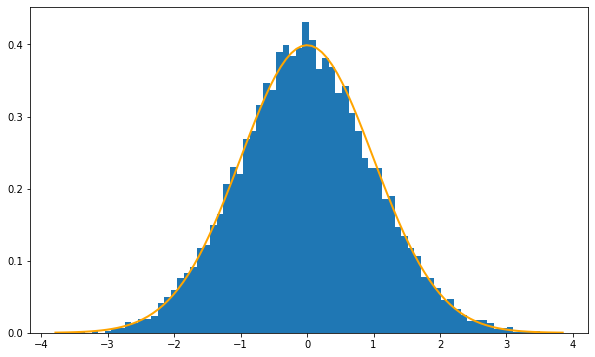

In [159]:
a = 2
b = 3
n = 100
true_mean = a / (a + b)
true_sig = np.sqrt((a * b) / (((a + b) ** 2) * (a + b + 1)))
temp_means = []
temp_samp = []
for _ in range(10000):
    temp_mean = np.mean(np.random.beta(a, b, size = n))
    temp_samp.append(np.sqrt(n) * (temp_mean - true_mean) / true_sig)
plt.figure(figsize=(10,6))
plt.hist(temp_samp, density = True, bins = 70);

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, 1)

plt.plot(x, p, 'k', linewidth = 2, color = "orange")

#### 2.2. Discrete case

Repeat the experiment but now with a discrete random variable. When plotting the histogram, be careful on how you define the bins. 


### n = 50

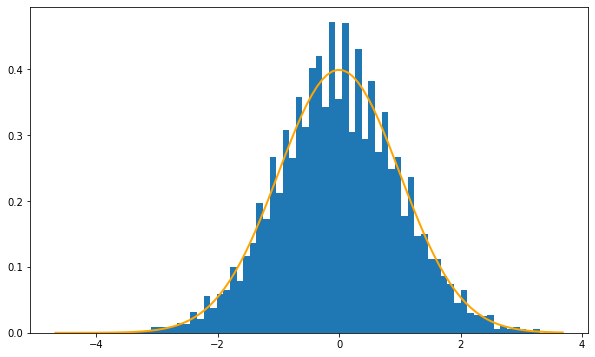

In [163]:
p = 0.7
N = 100
n = 50
true_mean = N * p
true_sig = np.sqrt(N * p * (1 - p))
temp_means = []
temp_samp = []
for _ in range(10000):
    temp_mean = np.mean(np.random.binomial(N, p, size = n))
    temp_samp.append(np.sqrt(n) * (temp_mean - true_mean) / true_sig)
plt.figure(figsize=(10,6))
plt.hist(temp_samp, density = True, bins = 70);

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, 1)

plt.plot(x, p, 'k', linewidth = 2, color = "orange")

### n = 100

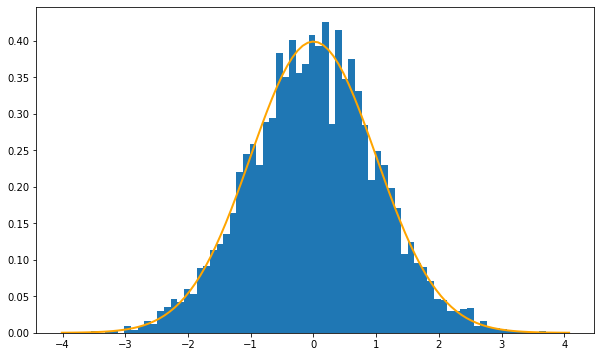

In [164]:
p = 0.7
N = 100
n = 100
true_mean = N * p
true_sig = np.sqrt(N * p * (1 - p))
temp_means = []
temp_samp = []
for _ in range(10000):
    temp_mean = np.mean(np.random.binomial(N, p, size = n))
    temp_samp.append(np.sqrt(n) * (temp_mean - true_mean) / true_sig)
plt.figure(figsize=(10,6))
plt.hist(temp_samp, density = True, bins = 70);

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, 1)

plt.plot(x, p, 'k', linewidth = 2, color = "orange")

### N = 500

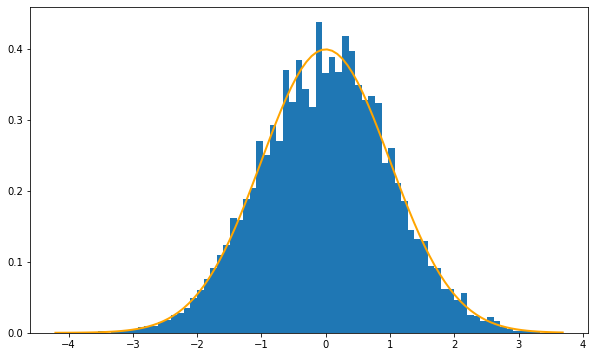

In [165]:
p = 0.7
N = 100
n = 500
true_mean = N * p
true_sig = np.sqrt(N * p * (1 - p))
temp_means = []
temp_samp = []
for _ in range(10000):
    temp_mean = np.mean(np.random.binomial(N, p, size = n))
    temp_samp.append(np.sqrt(n) * (temp_mean - true_mean) / true_sig)
plt.figure(figsize=(10,6))
plt.hist(temp_samp, density = True, bins = 70);

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, 1)

plt.plot(x, p, 'k', linewidth = 2, color = "orange")

#### 2.3. [Optional] Distribution without second moment

Consider now a distribution with defined mean without finite second moment. In principle, the central limit theorem does not apply for this case. Generate a simulation of the sample mean for a distribution with these properties and try to understand the behavior of the scaled sample mean as $n$ increases. You may find interesting the reading about [stable distributions](https://en.wikipedia.org/wiki/Stable_distribution).

### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: Kenneth Chen - kenneth01px2018
- Member No2: 
- Member No3: